Pruebas en el modelo v6

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import _init_paths

import os

import torch
import torch.utils.data
from opts import opts
from models.model import create_model, load_model, save_model
from models.data_parallel import DataParallel
from logger import Logger
from datasets.dataset_factory import get_dataset
from trains.train_factory import train_factory
import cv2
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from detectors.detector_factory import detector_factory

image_ext = ['jpg', 'jpeg', 'png', 'webp']
video_ext = ['mp4', 'mov', 'avi', 'mkv']
time_stats = ['tot', 'load', 'pre', 'net', 'dec', 'post', 'merge']

In [2]:
sys.argv = ['-f', 'ctdetv2', '--demo', '../images/yolo/', '--arch','dlav6_34',  '--load_model' ,'../exp/ctdetv2/coco_dlav6/model_best.pth'] #cmd = 'ctdet --exp_id coco_dla --batch_size 4 --lr 1.25e-4  --gpus 0 --num_workers 0'
opt = opts().parse()
print(opt.task)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  C:\Users\avata\FewShot-CenterNet\src\lib\..\..\exp\ctdetv2\default
ctdetv2


In [3]:
opt = opts().init()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  C:\Users\avata\FewShot-CenterNet\src\lib\..\..\exp\ctdetv2\default
heads {'hm': 80, 'wh': 2, 'reg': 2}


In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = opt.gpus_str
#opt.debug = max(opt.debug, 1)
opt.debug = 1
opt.vis_thresh = 0.05
Detector = detector_factory[opt.task]
detector = Detector(opt)

Creating model...
loaded ../exp/ctdetv2/coco_dlav6/model_best.pth, epoch 220


In [5]:
detector.model

DLASeg(
  (base): DLA(
    (base_layer): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level0): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level2): Tree(
      (tree1): BasicBlock(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

In [6]:
detector.model.load_state_dict(torch.load("model_wb_yolo.pth"))

<All keys matched successfully>

In [7]:
opt.demo = '../images/DBPaper/'
image_names = [opt.demo]
images_path = {}
ls = os.listdir(opt.demo)

for folder_name in sorted(ls):
    image_names = []
    ls2 = os.listdir(os.path.join(opt.demo, folder_name))
    for file_name in sorted(ls2):
      ext = file_name[file_name.rfind('.') + 1:].lower()
      if ext in image_ext:
          image_names.append(os.path.join(opt.demo, folder_name, file_name).replace("\\","/"))
    images_path[folder_name] = image_names
"""
images_path['ak47'] :
 ['../images/256_ObjectCategories/Caltech80/train/ak47/001_0002.jpg',
  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0003.jpg',
  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0029.jpg',
  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0036.jpg',
  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0058.jpg'],
"""

"\nimages_path['ak47'] :\n ['../images/256_ObjectCategories/Caltech80/train/ak47/001_0002.jpg',\n  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0003.jpg',\n  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0029.jpg',\n  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0036.jpg',\n  '../images/256_ObjectCategories/Caltech80/train/ak47/001_0058.jpg'],\n"

In [8]:
class_name_yolo = list(images_path.keys())

In [9]:
import numpy as np
id_40 = np.arange(len(images_path.keys()))
id_80 = np.concatenate([id_40,id_40])

In [10]:
"""
count = 0
total = 0
for index_w, folder in enumerate(images_path.keys()): 
    for (image_name) in images_path[folder]:
        ret = detector.run(image_name)
        dets = ret['dets']        
        topC = int(dets[0,0,5])
        #print(dets[0,0,4], dets[0,0,5], class_name_yolo[id_80[topC]])
        if(folder == class_name_yolo[id_80[topC]]):
            count+=1
        total += 1
acc = count / total
print(acc)
"""

"\ncount = 0\ntotal = 0\nfor index_w, folder in enumerate(images_path.keys()): \n    for (image_name) in images_path[folder]:\n        ret = detector.run(image_name)\n        dets = ret['dets']        \n        topC = int(dets[0,0,5])\n        #print(dets[0,0,4], dets[0,0,5], class_name_yolo[id_80[topC]])\n        if(folder == class_name_yolo[id_80[topC]]):\n            count+=1\n        total += 1\nacc = count / total\nprint(acc)\n"

In [73]:
imagen_test = '../images/test/122_imgrgb.png'
ret = detector.run(imagen_test)
output = ret['output']
pred_obj = output['objns']
hm = pred_obj.squeeze(0).squeeze(0)
batch, cat, height, width = pred_obj.size() #1,1,128,128
topk_scores, topk_inds = torch.topk(pred_obj.view(1, cat, -1), 20)
topk_inds = topk_inds % (height * width)
topk_ys   = (topk_inds / width).int()
topk_xs   = (topk_inds % width).int()

In [119]:
ret['dets'][0]

tensor([[4.4198e+01, 9.3649e+01, 5.5043e+01, 1.0374e+02, 1.2361e-01, 6.6000e+01],
        [4.4198e+01, 9.3649e+01, 5.5043e+01, 1.0374e+02, 1.2361e-01, 2.6000e+01],
        [6.7903e+01, 7.1494e+01, 9.9580e+01, 1.0160e+02, 1.1537e-01, 1.0000e+01],
        [6.7903e+01, 7.1494e+01, 9.9580e+01, 1.0160e+02, 1.1537e-01, 5.0000e+01],
        [1.0627e+02, 2.0014e+01, 1.2657e+02, 2.6407e+01, 5.7096e-02, 6.7000e+01],
        [1.0627e+02, 2.0014e+01, 1.2657e+02, 2.6407e+01, 5.7096e-02, 2.7000e+01],
        [4.4669e+01, 6.2325e+01, 5.4793e+01, 8.2941e+01, 5.7035e-02, 4.0000e+01],
        [4.4669e+01, 6.2325e+01, 5.4793e+01, 8.2941e+01, 5.7035e-02, 0.0000e+00],
        [1.2582e+02, 8.4618e+01, 1.2698e+02, 1.0441e+02, 5.4984e-02, 2.7000e+01],
        [1.2582e+02, 8.4618e+01, 1.2698e+02, 1.0441e+02, 5.4984e-02, 6.7000e+01],
        [4.4440e+01, 6.2408e+01, 5.4788e+01, 9.2773e+01, 5.2475e-02, 4.0000e+01],
        [4.4440e+01, 6.2408e+01, 5.4788e+01, 9.2773e+01, 5.2475e-02, 0.0000e+00],
        [6.8096e

In [89]:
results = ret['results']

In [120]:
results

{1: array([[2.2334642e+02, 2.3162381e+02, 2.7396283e+02, 3.3470584e+02,
         5.7035014e-02],
        [2.2220078e+02, 2.3204115e+02, 2.7393997e+02, 3.8386685e+02,
         5.2475408e-02],
        [2.7786609e+02, 2.3376968e+02, 3.4551987e+02, 3.5113495e+02,
         3.8770389e-02],
        [2.2995169e+02, 3.2664352e+02, 2.6842889e+02, 3.8567429e+02,
         3.5345409e-02]], dtype=float32),
 2: array([[2.2334642e+02, 2.3162381e+02, 2.7396283e+02, 3.3470584e+02,
         4.6465106e-02],
        [2.8162308e+02, 3.4020779e+02, 3.3150891e+02, 3.9711911e+02,
         4.3309443e-02],
        [2.2220078e+02, 2.3204115e+02, 2.7393997e+02, 3.8386685e+02,
         3.8698915e-02],
        [2.7786609e+02, 2.3376968e+02, 3.4551987e+02, 3.5113495e+02,
         3.2626621e-02]], dtype=float32),
 3: array([], shape=(0, 5), dtype=float32),
 4: array([], shape=(0, 5), dtype=float32),
 5: array([], shape=(0, 5), dtype=float32),
 6: array([], shape=(0, 5), dtype=float32),
 7: array([[2.8162308e+02, 3.402

In [113]:
for bbox in results[1]:
    bbox[4]

In [114]:
bbox

array([2.2995169e+02, 3.2664352e+02, 2.6842889e+02, 3.8567429e+02,
       3.5345409e-02], dtype=float32)

In [112]:
results

{1: array([[2.2334642e+02, 2.3162381e+02, 2.7396283e+02, 3.3470584e+02,
         5.7035014e-02],
        [2.2220078e+02, 2.3204115e+02, 2.7393997e+02, 3.8386685e+02,
         5.2475408e-02],
        [2.7786609e+02, 2.3376968e+02, 3.4551987e+02, 3.5113495e+02,
         3.8770389e-02],
        [2.2995169e+02, 3.2664352e+02, 2.6842889e+02, 3.8567429e+02,
         3.5345409e-02]], dtype=float32),
 2: array([[2.2334642e+02, 2.3162381e+02, 2.7396283e+02, 3.3470584e+02,
         4.6465106e-02],
        [2.8162308e+02, 3.4020779e+02, 3.3150891e+02, 3.9711911e+02,
         4.3309443e-02],
        [2.2220078e+02, 2.3204115e+02, 2.7393997e+02, 3.8386685e+02,
         3.8698915e-02],
        [2.7786609e+02, 2.3376968e+02, 3.4551987e+02, 3.5113495e+02,
         3.2626621e-02]], dtype=float32),
 3: array([], shape=(0, 5), dtype=float32),
 4: array([], shape=(0, 5), dtype=float32),
 5: array([], shape=(0, 5), dtype=float32),
 6: array([], shape=(0, 5), dtype=float32),
 7: array([[2.8162308e+02, 3.402

In [87]:
results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

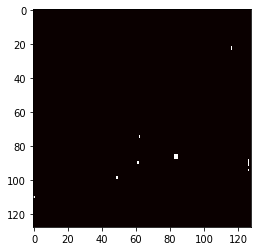

In [74]:
hm_top10 = torch.zeros((128,128))
for x,y in zip(topk_ys.detach().cpu().numpy(),topk_xs.detach().cpu().numpy()):
    hm_top10[x,y]=1
plt.imshow(hm_top10, cmap='hot', interpolation='nearest')

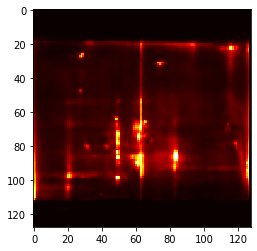

In [18]:
plt.imshow(hm.detach().cpu().numpy(), cmap='hot', interpolation='nearest')
plt.savefig('hm_prueba.png')


In [12]:
resultados = ret['results'] #[100, 6]

In [13]:
resultados

{1: array([[6.9336206e+02, 7.1010248e+02, 7.7190668e+02, 8.1895972e+02,
         7.3436141e-02],
        [5.4615649e+02, 5.8020642e+02, 6.3973810e+02, 7.3565765e+02,
         5.8065273e-02],
        [8.2073767e+02, 4.6017218e+02, 9.2578101e+02, 7.0686255e+02,
         5.2838851e-02],
        [8.5339935e+02, 7.0780981e+02, 9.5492157e+02, 8.3824182e+02,
         5.1126022e-02],
        [9.7022125e+02, 5.9429443e+02, 1.1213828e+03, 7.9166980e+02,
         3.3155572e-02]], dtype=float32),
 2: array([[8.2073767e+02, 4.6017218e+02, 9.2578101e+02, 7.0686255e+02,
         4.6219047e-02],
        [5.4615649e+02, 5.8020642e+02, 6.3973810e+02, 7.3565765e+02,
         4.5372367e-02],
        [8.5339935e+02, 7.0780981e+02, 9.5492157e+02, 8.3824182e+02,
         4.1029580e-02],
        [6.8872809e+02, 7.1010071e+02, 7.6878625e+02, 8.1943835e+02,
         3.9225060e-02],
        [9.7022125e+02, 5.9429443e+02, 1.1213828e+03, 7.9166980e+02,
         3.0008288e-02]], dtype=float32),
 3: array([], shape=